**Example** 5 We have a piece of cardboard that is 14 inches by 10 inches and we’re going to cut out the corners as shown below and fold up the sides to form a box, also shown below. Determine the height of the box that will give a maximum volume.


---

![替代文字](http://tutorial.math.lamar.edu/Classes/CalcI/Optimization_Files/image006.gif)

Let’s let the height of the box be 
h
. So, the width/length of the corners being cut out is also 
h
 and so the vertical side will have a “new” height of 
10
−
2
h
 and the horizontal side will have a “new” width of 
14
−
2
h
. Here is a sketch with all this information put in,

![替代文字](http://tutorial.math.lamar.edu/Classes/CalcI/Optimization_Files/image007.png)

In this example, for the first time, we’ve run into a problem where the constraint doesn’t really have an equation. The constraint is simply the size of the piece of cardboard and has already been factored into the figure above. This will happen on occasion and so don’t get excited about it when it does. This just means that we have one less equation to worry about. In this case we want to maximize the volume. Here is the volume, in terms of 
h
 and its first derivative.
 
 $V(h)=h(14−2h)(10−2h)=140h−48h^2+4h^3$<p></p>
 $V′(h)=140−96h+12h^2$


In [0]:
# 1.1 Import tensorflow and other libraries.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import numpy

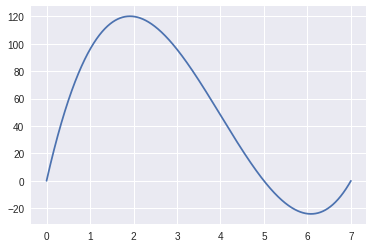

In [59]:
# 1.2 Create input data using NumPy. y = x * 0.1 + 0.3 + noise

x = np.arange(0,7,0.00001)
y = x*(14-2*x)*(10-2*x)
plt.plot(x,y)

In [0]:
def main_func(x):
  return x*(14-2*x)*(10-2*x)

In [0]:
# 1.3 Buld inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
x = tf.Variable(tf.random_uniform([1], 0, 2))

# Uncomment the following lines to see W and b are.
# print(W)
# print(b)

In [0]:
# 1.4 Build training graph.
loss = tf.reduce_mean(main_func(x))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(-0.01)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.initialize_all_variables()  # Create an operation initializes all the variables.

# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are.
# print("loss:", loss)
# print("optimizer:", optimizer)
# print("train:", train)
# print(init)

In [66]:
# 1.6 Create a session and launch the graph.
sess = tf.Session()
sess.run(init)
#y_initial_values = sess.run(x)  # Save initial values for plotting later.

# Uncomment the following line to see the initial W and b values.
print(sess.run([x]))

[array([0.4152727], dtype=float32)]


In [68]:
# 1.7 Perform training.
for step in range(15):
    sess.run(train)
    # Uncomment the following two lines to watch training happen real time.
    # if step % 20 == 0:
    print(step, sess.run([x]))
    
print(sess.run([x]))

0 [array([1.917955], dtype=float32)]
1 [array([1.9181443], dtype=float32)]
2 [array([1.9182391], dtype=float32)]
3 [array([1.9182866], dtype=float32)]
4 [array([1.9183103], dtype=float32)]
5 [array([1.9183222], dtype=float32)]
6 [array([1.918328], dtype=float32)]
7 [array([1.918331], dtype=float32)]
8 [array([1.9183325], dtype=float32)]
9 [array([1.9183333], dtype=float32)]
10 [array([1.9183336], dtype=float32)]
11 [array([1.9183338], dtype=float32)]
12 [array([1.9183339], dtype=float32)]
13 [array([1.9183339], dtype=float32)]
14 [array([1.9183339], dtype=float32)]
[array([1.9183339], dtype=float32)]


In [71]:
h = 1.918
x1 = (14 - 2 * h)
x1

10.164

In [73]:
y1 = (10 - 2 * h)
y1

6.164

In [74]:
h * x1 * y1

120.16441852799998

Use Genetic algorithm find global Maximum 
$$volume =  x * y * h$$


In [75]:
import numpy as np

import multiprocessing
from collections import OrderedDict
import os
import time


def eval_iter(arg_lst, l_lst):
    for c_i, args in enumerate(arg_lst):
        yield c_i, args, l_lst


def eval_func(c_i, args, l_lst):
    assert len(args) == 3
    x = args[0]
    y = args[1]
    z = args[2]
    res = 1000 - (x*y*z)
    print(f"Eval {x}, {y}, {z}: {res}")
    l_lst[c_i] = res


if __name__ == '__main__':

    generation_num = 100
    child_num = 5

    space = OrderedDict((
        ('x', (10.,12.)),
        ('y', (5.,7.)),
        ('z', (0.,2.))
    ))

    params = OrderedDict([(nm, []) for nm in space.keys()])
    for nm, v_range in space.items():
        params[nm] = np.random.uniform(v_range[0], v_range[1], size=child_num)

    arg_list = []
    for c_n in range(child_num):
        arg_list.append([val[c_n] for val in params.values()])

    manager = multiprocessing.Manager()
    loss_lst = manager.list([np.inf for i in range(child_num)])

    for r_n in range(generation_num):
        with multiprocessing.Pool(os.cpu_count()) as pool:
            pool.starmap(eval_func, eval_iter(arg_list, loss_lst))

        fittest_idx = int(np.argmin(loss_lst))
        base_args = arg_list[fittest_idx]
        print(f"Best {base_args}\n")

        # mutate offspring from fittest individual
        params = OrderedDict([(nm, []) for nm in space.keys()])
        for s_i, (nm, v_range) in enumerate(space.items()):
            std = (v_range[1] - v_range[0]) / 2
            noise = np.random.normal(0, std, size=child_num)
            new_param = base_args[s_i] + noise
            params[nm] = np.clip(new_param, v_range[0], v_range[1])

        arg_list = []
        for c_n in range(child_num):
            arg_list.append([val[c_n] for val in params.values()])

        loss_lst = manager.list([np.inf for i in range(child_num)])

Eval 11.142071202102192, 5.378065297533803, 0.5322162163284689: 968.1081213105889
Eval 10.39907722150635, 6.791994891903634, 1.356884306688523: 904.1626109703401
Eval 11.357278805873637, 6.9684562583934175, 1.0017774515557711: 920.7166271106294
Eval 10.82127242146072, 6.422887499975012, 1.5375424077821127: 893.1349363665444
Eval 11.807290544224848, 5.456162675063026, 0.6460795714014118: 958.3779401287331
Best [10.82127242146072, 6.422887499975012, 1.5375424077821127]

Eval 10.588923881308093, 7.0, 2.0: 851.7550656616867
Eval 10.0, 6.283950370806603, 2.0: 874.3209925838679
Eval 12.0, 6.4693885735581205, 2.0: 844.7346742346051
Eval 10.9364591422892, 5.759004628496227, 2.0: 874.0337623603932
Eval 10.750633525046226, 6.824779564445155, 0.5233611309311945: 961.6006253843685
Best [12.0, 6.4693885735581205, 2.0]

Eval 11.81392214499962, 7.0, 2.0: 834.6050899700053
Eval 12.0, 5.0, 2.0: 880.0
Eval 12.0, 6.896139164448266, 1.6293451030760286: 865.1657130673048
Eval 11.331962821140948, 5.99622728